O problema consiste em encontrar um modelo que seja capaz de prever os preços de casas na região de King County em Washington
a partir dos atributos presentes no dataset.
Para tal, será usado um método de aprendizado supervisionado por regressão. Como o dataset não é tão grande o método utilizado
será de aprendizado por batch.
O desempenho do modelo será medido através da verificação dos valores da função de custo, buscando minimizar esta (RMSE e MAE).

O Notebook em questão apresentará o preprocessamento dos dados até que eles possam ser utilizados em um algoritmo de Machine Learning, bem como a utilização de diferentes algoritmos buscando os que possuem melhor desempenho. Uma vez encontrado um algoritmo mais promissor, usaremos GridSearch e RandomizedSearch para encontrar os melhores hiperparâmetros deste algoritmo.

Este Notebook foi desenvolvido tendo como base o passo-a-passo do livro "Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow" e o Dataset utilizado pode ser encontrado no site do Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/code?datasetId=128&sortBy=voteCount


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("Display.max_columns", 34)

from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv(r"C:\Users\Pichau Gamer\Desktop\DS\Portfolio\KC Houses\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Obtendo informações Gerais sobre o Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Podemos observar que não há variáveis categóricas nem valores nulos no Dataset, o que irá facilitar a etapa de pré-processamento.
As colunas 'id' e 'date' não apresentam informações úteis para nosso modelo futuro, então iremos removê-las desde o início.

Uma vez feito isso, partiremos para a análise exploratória dos dados.


In [6]:
data.drop(['id','date'], axis=1, inplace=True)

## Análise Exploratória

## Distribuição das variáveis

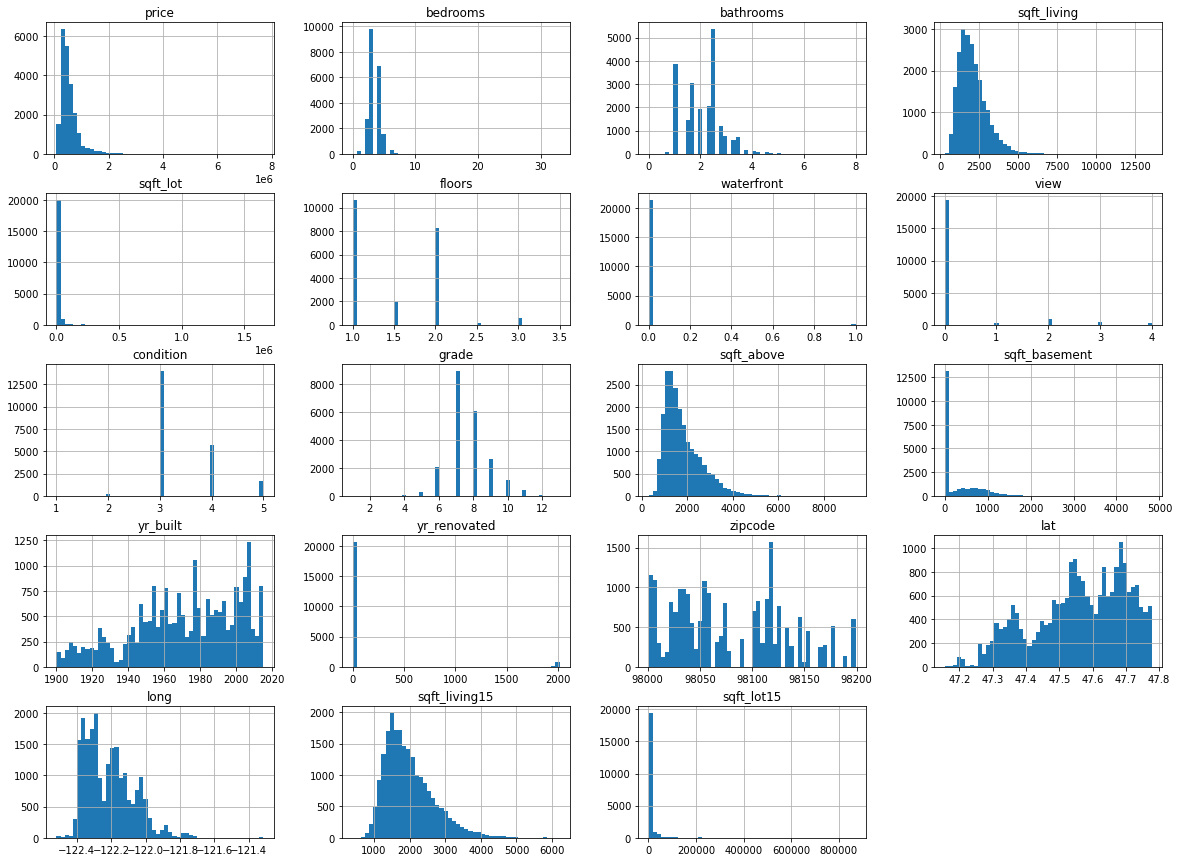

In [7]:
# Checa as distribuições para cada variável numérica num histograma.

%matplotlib inline 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

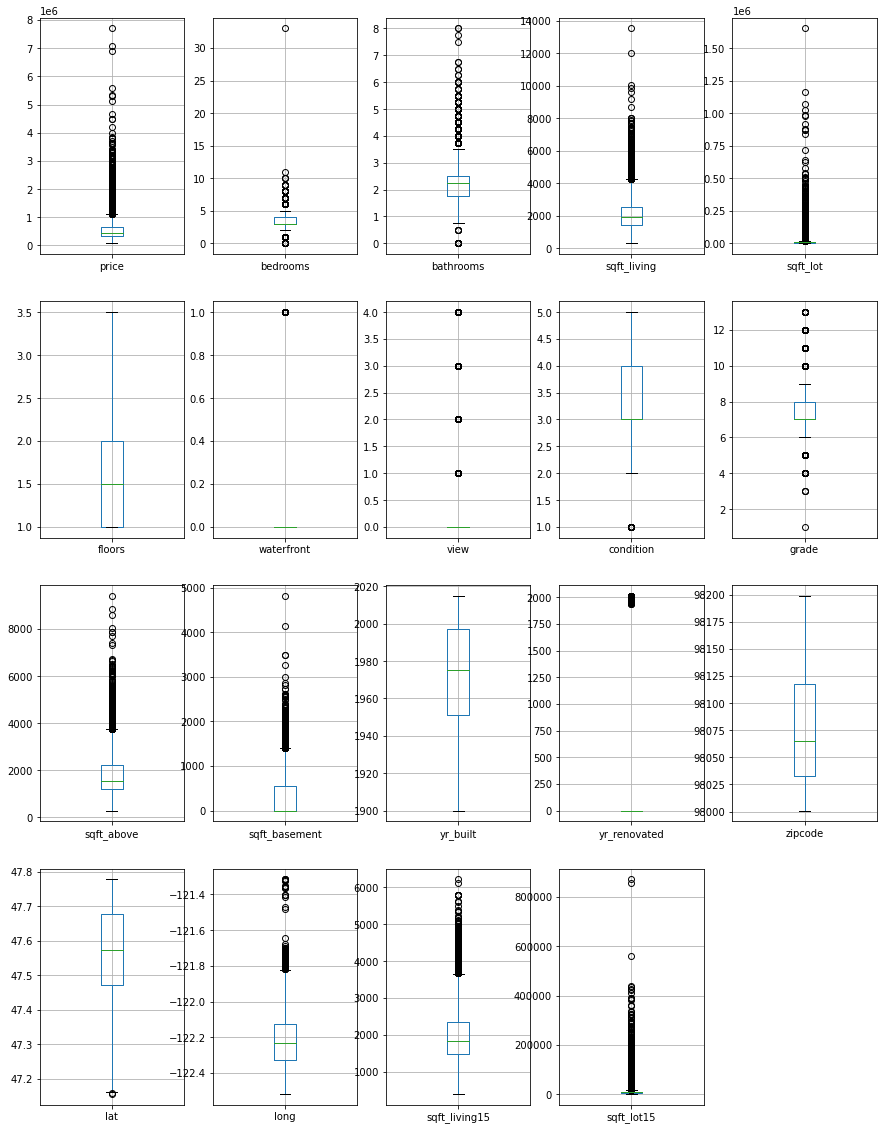

In [9]:
plt.figure(figsize=(15,20))
for i, col in enumerate(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                         'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                         'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                         'sqft_living15', 'sqft_lot15'], start=1):
    plt.subplot(4,5,i)
    data.boxplot(col)

Embora nós observemos outliers na maior parte das variáveis, é possível que estes representem casas ou apartamentos de luxo.
Alguns deles se destacam como os imóveis com preço na faixa dos USD $7 milhões e com 33 quartos, porém iremos mantê-los mesmo assim.

In [10]:
# Separando dados de teste

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

17290
4323


In [11]:
test_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


Para manter proporções similares entre o conjunto de teste e de treino, nós iremos assumir que o atributo "sqft_living" seja
um dos principais na hora de definir o preço da casa e portanto faremos uma divisão estratificada dos dois conjuntos com base neste atributo.

In [12]:
# Criando uma variável categórica para agrupar os valores de sqft_living.
data['sqft_cat'] = pd.cut(data['sqft_living'],
                         bins=[0., 1000, 2000, 3000, 4000, np.inf],
                         labels=[1, 2, 3, 4, 5])

In [13]:
data['sqft_cat'].value_counts()

2    10218
3     6819
4     2299
1     1494
5      783
Name: sqft_cat, dtype: int64

<AxesSubplot:>

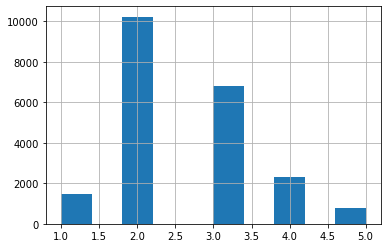

In [14]:
data['sqft_cat'].hist()

In [15]:
# Agora podemos fazer uma amostragem estratificada
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['sqft_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [16]:
# Verificando a resultado da estratificação
strat_test_set["sqft_cat"].value_counts()/len(strat_test_set)

2    0.472820
3    0.315522
4    0.106408
1    0.069165
5    0.036086
Name: sqft_cat, dtype: float64

In [17]:
data["sqft_cat"].value_counts()/len(data)

2    0.472771
3    0.315505
4    0.106371
1    0.069125
5    0.036228
Name: sqft_cat, dtype: float64

In [18]:
def sqft_cat_proportions(data_used):
    return data_used["sqft_cat"].value_counts()/len(data_used)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": sqft_cat_proportions(data),
    "Stratified": sqft_cat_proportions(strat_test_set),
    "Random": sqft_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100*compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100*compare_props["Stratified"] / compare_props["Overall"] -100

In [19]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.069125,0.069165,0.065232,-5.631223,0.057675
2,0.472771,0.472820,0.470044,-0.576826,0.010319
3,0.315505,0.315522,0.318297,0.885224,0.005411
4,0.106371,0.106408,0.105020,-1.270554,0.034240
5,0.036228,0.036086,0.041406,14.293383,-0.392359


In [20]:
# removendo a feature sqft_cat dos conjuntos de treino e teste
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sqft_cat", axis=1, inplace=True)

In [21]:
house_df = strat_train_set.copy()
print(len(house_df))

17290


## Distribuição Geográfica das Instâncias

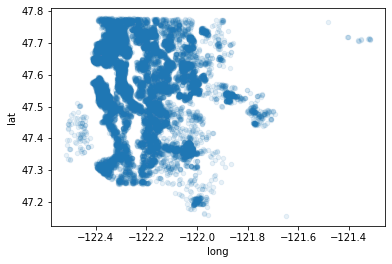

In [22]:
# visualizando o diagrama a partir das informações geográficas (latitude e longitude)
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.1)
plt.show()

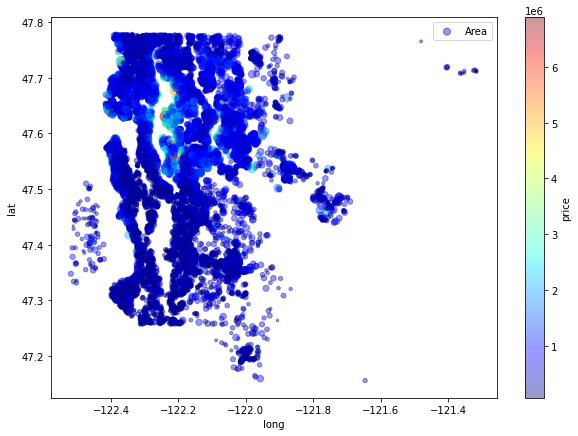

In [23]:
house_df.plot(kind="scatter", x="long", y="lat", alpha=0.4,
             s=house_df["sqft_living"]/100, label="Area", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

Podemos notar que as variáveis longitude e latitude de fato influenciam no preço dos imóveis, porém a visualização é um pouco afetada pelo alto número de outliers no conjunto de dados.

## Matriz de Dispersão

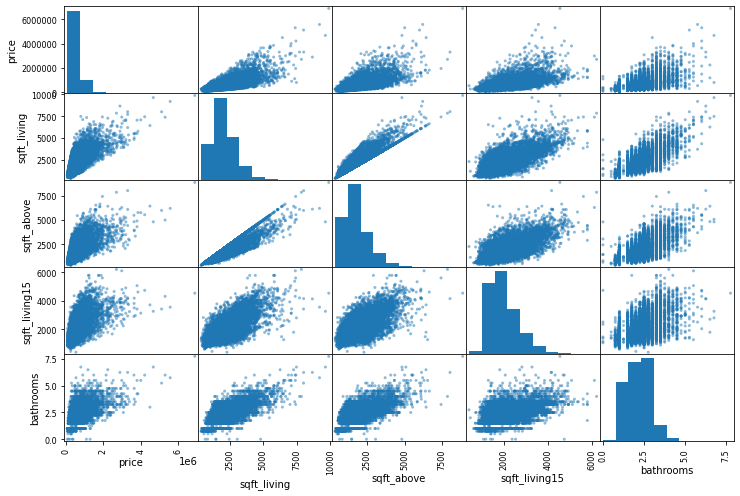

In [24]:
# Plottando uma matriz de dispersão com os atributos numéricos mais promissores 

from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "sqft_above", "sqft_living15", "bathrooms"]
scatter_matrix(house_df[attributes], figsize=(12,8))
plt.show()

De fato podemos perceber que a feature sqft_living parece a mais influente, vamos observá-la separadamente.

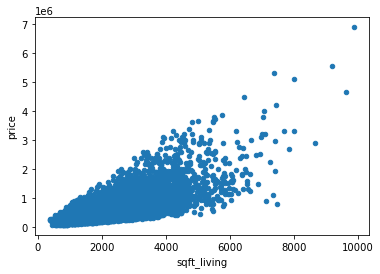

In [25]:
house_df.plot(kind="scatter", x="sqft_living", y="price")
plt.show()

## Correlação Linear entre variáveis

In [26]:
corr_matrix = house_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701775
grade            0.674233
sqft_above       0.605138
sqft_living15    0.589198
bathrooms        0.524423
view             0.391473
sqft_basement    0.320217
bedrooms         0.308481
lat              0.308047
waterfront       0.260134
floors           0.259674
yr_renovated     0.113914
sqft_lot         0.091348
sqft_lot15       0.088732
yr_built         0.060392
condition        0.037335
long             0.025021
zipcode         -0.058326
Name: price, dtype: float64

## Combinações de atributos

Testaremos a criação de novos atributos a partir dos que já temos:

graded_area = combinação de sqft_living com grade, as duas variáveis que tiveram maior índice de correlação.
OBS: Grade é uma variável numérica que representa uma nota subjetiva (de 1 a 13) referente a construção e design do imóvel. Quanto maior o valor, maior a qualidade do imóvel.

lot_pctg_built = percentual do terreno construído. obs: pode ser maior do que 1 se o imóvel tiver mais de um andar.

yrs_since_last_renov = tempo passado desde a última reforma (ou idade do imóvel se nunca foi reformado)

In [27]:
house_df["graded_area"] = house_df["sqft_living"]*house_df["grade"]
house_df["lot_pctg_built"] = house_df["sqft_living"]/house_df["sqft_lot"]

In [28]:
yrs_since_last_renov = []
for value1, value2 in zip(house_df["yr_renovated"], house_df["yr_built"]):
    if value1 != 0:
        yrs_since_last_renov.append(2015 - value1)
    else:
        yrs_since_last_renov.append(2015 - value2)

house_df["yrs_since_last_renov"] = yrs_since_last_renov

In [29]:
house_df.drop(["yr_renovated","yr_built"], axis=1, inplace=True)

Vamos observar a nova matriz de correlação, desta vez a partir de um Heatmap

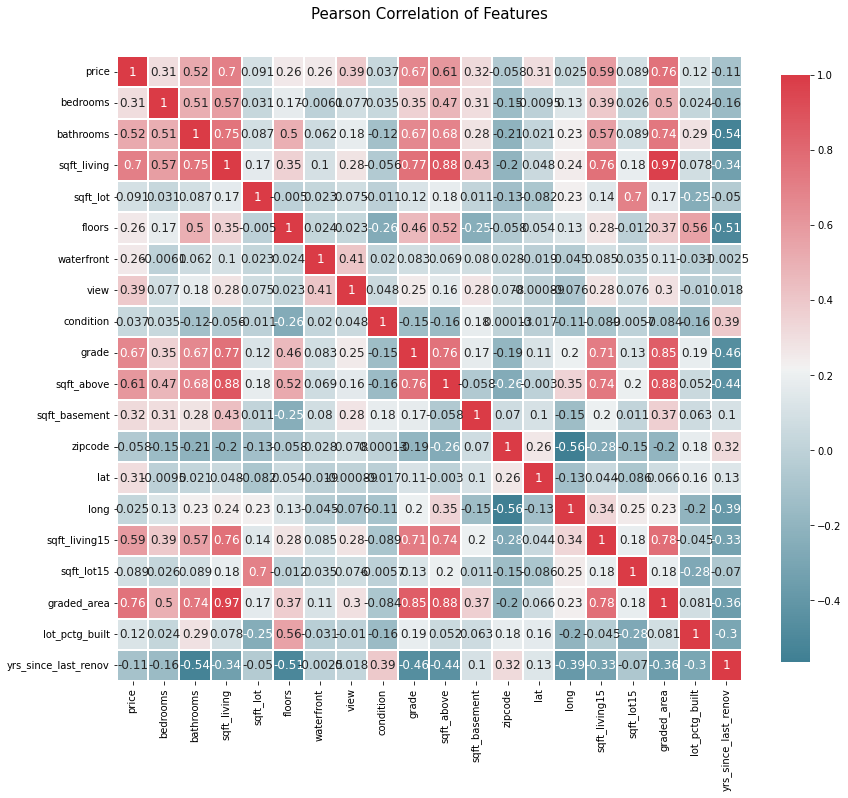

In [30]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(house_df)

Podemos notar que o novo atributo "graded_area" obteve um valor de correlação linear ainda maior do que os demais com o preço. 
Já o atributo "yrs_since_last_renov" mostrou ter uma pequena correlação negativa com o preço do imóvel, o que era esperado.

In [31]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'graded_area', 'lot_pctg_built', 'yrs_since_last_renov'],
      dtype='object')

## Preparando os dados para o Algoritmo de Machine Learning

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
house_ml = house_df.drop("price", axis=1) # dropando a coluna label
house_ml_labels = house_df['price'].copy()


In [34]:
house_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 20474 to 1941
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bedrooms              17290 non-null  int64  
 1   bathrooms             17290 non-null  float64
 2   sqft_living           17290 non-null  int64  
 3   sqft_lot              17290 non-null  int64  
 4   floors                17290 non-null  float64
 5   waterfront            17290 non-null  int64  
 6   view                  17290 non-null  int64  
 7   condition             17290 non-null  int64  
 8   grade                 17290 non-null  int64  
 9   sqft_above            17290 non-null  int64  
 10  sqft_basement         17290 non-null  int64  
 11  zipcode               17290 non-null  int64  
 12  lat                   17290 non-null  float64
 13  long                  17290 non-null  float64
 14  sqft_living15         17290 non-null  int64  
 15  sqft_lot15      

Iremos criar um pipeline para o preprocessamento dos dados. Neste caso o pipeline irá conter apenas o StandardScaler, visto que o objetivo principal é conseguir fazer um pipeline funcional.

Como todas as colunas do dataset são numéricas não se faz necessário criar um pipeline para atributos categóricos.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler # usando standard scaler ao invés de min-max scaler por conta dos outliers

num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

house_ml_prepared = num_pipeline.fit_transform(house_ml)

## Treinando os Modelos Iniciais

Vamos começar com dois modelos bastante simples de Regressão Linear e Decision Tree para estabelecer um parâmetro base.

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_ml_prepared, house_ml_labels)

LinearRegression()

In [37]:
# testando nosso algoritmo com algumas instâncias
some_data = house_ml.iloc[:5]
some_labels = house_ml_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 554034.39288437  224281.06378794 1187788.87802089  250050.66037244
  413622.12055027]
Labels: [379000.0, 173000.0, 1393000.0, 390000.0, 440500.0]


Podemos perceber que nosso modelo de Regressão Linear não está performando muito bem, vamos checar o RMSE e o MAE dele.

In [38]:
# Calculando o RMSE deste modelo de regressão

linreg_predictions = lin_reg.predict(house_ml_prepared)
lin_r2 = r2_score(house_ml_labels, linreg_predictions)
lin_rmse = mean_squared_error(house_ml_labels, linreg_predictions, squared=False)
lin_mae = mean_absolute_error(house_ml_labels, linreg_predictions)

print("R2 Score:", lin_r2)
print("Root Mean Squared Error para Regressão Linear:", lin_rmse)
print("Mean Absolute Error:", lin_mae)

R2 Score: 0.7347226631205312
Root Mean Squared Error para Regressão Linear: 186096.73727076355
Mean Absolute Error: 118465.83629769587


Vamos ver se o modelo de Decision Trees oferece um desempenho melhor:

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(house_ml_prepared, house_ml_labels)

DecisionTreeRegressor(random_state=42)

In [40]:
tree_predictions = tree_reg.predict(house_ml_prepared)

tree_r2 = r2_score(house_ml_labels, tree_predictions)
tree_rmse = mean_squared_error(house_ml_labels, tree_predictions, squared=False)
tree_mae = mean_absolute_error(house_ml_labels, tree_predictions) 

print("R2 Score:", tree_r2)
print("Root Mean Squared Error para Regressão Linear:", tree_rmse)
print("Mean Absolute Error:", tree_mae)


R2 Score: 0.999275629233912
Root Mean Squared Error para Regressão Linear: 9724.541675960358
Mean Absolute Error: 875.4366107576634


Parece muito provável que o modelo esteja sofrendo de Overfitting, visto que o erro foi muito baixo. Para confirmar a hipótese,
iremos realizar a validação cruzada nos dados de treino.

## Melhor avaliação usando Cross-Validation

## Decision Tree Regressor

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores_dt = cross_validate(tree_reg, house_ml_prepared, house_ml_labels,
                        scoring="neg_mean_squared_error", cv=10, return_train_score=True)

scores_dt = pd.DataFrame(scores_dt)
scores_dt['test_score'] = np.sqrt(-scores_dt['test_score'])
scores_dt['train_score'] = np.sqrt(-scores_dt['train_score'])
scores_dt['erro%'] = ((scores_dt['train_score'] - scores_dt['test_score'])/scores_dt['train_score'])*100
scores_dt

,fit_time,score_time,test_score,train_score,erro%
0,0.183510,0.001995,172608.517392,9418.325351,-1732.687988
1,0.181513,0.000998,174528.910630,9000.711879,-1839.056743
2,0.181514,0.000998,170897.859666,9667.170879,-1667.816684
3,0.181542,0.000970,171858.176514,8709.084296,-1873.320853
4,0.178495,0.000998,166716.478223,8843.904768,-1785.100333
5,0.180545,0.000997,181695.695656,9543.598486,-1803.848909
6,0.180517,0.001002,156094.963536,9472.376101,-1547.896598
7,0.181542,0.000997,188098.170959,9115.169238,-1963.572996
8,0.180511,0.001003,182860.913356,8984.704475,-1935.246834
9,0.177837,0.000997,189243.584125,9435.643703,-1905.624524


De fato constatamos que o modelo original estava sofrendo de sobreajuste, quando aplicamos a validação cruzada o modelo apresenta uma performance bastante similar ao de Regressão Linear.

Aplicaremos a validação cruzada para o 1o modelo também.

## Linear Regression

In [42]:
lin_scores = cross_validate(lin_reg, house_ml_prepared, house_ml_labels,
                            scoring="neg_mean_squared_error", cv=10, return_train_score=True)

scores_lr = pd.DataFrame(lin_scores)
scores_lr['test_score'] = np.sqrt(-scores_lr['test_score'])
scores_lr['train_score'] = np.sqrt(-scores_lr['train_score'])
scores_lr['erro%'] = ((scores_lr['train_score'] - scores_lr['test_score'])/scores_lr['train_score'])*100
scores_lr


,fit_time,score_time,test_score,train_score,erro%
0,0.005982,0.000997,179582.082260,186865.594279,3.897728
1,0.006981,0.000000,190694.261225,185604.197449,-2.742429
2,0.006981,0.000000,210618.089605,183215.811004,-14.956285
3,0.006982,0.000997,168254.536823,187987.414022,10.496914
4,0.005984,0.000000,178741.305151,186946.923813,4.389277
5,0.005984,0.000000,186843.412449,186041.639067,-0.430964
6,0.005984,0.000000,178189.794634,187013.416738,4.718176
7,0.005985,0.000000,196465.210821,185019.412722,-6.186269
8,0.004987,0.000997,188449.293859,185863.624537,-1.391165
9,0.005983,0.000000,187222.890210,185983.426607,-0.666438


Nosso modelo de Regressão Linear, embora tenha um RMSE maior, não está sofrendo de sobreajuste, o que o torna mais confiável na hora de generalizar para dados ainda não testados.



## Support Vector Regressor

In [43]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(house_ml_prepared, house_ml_labels)

SVR_scores = cross_validate(SVR, house_ml_prepared, house_ml_labels,
                           scoring="neg_mean_squared_error", cv=10, return_train_score=True)



In [44]:
scores_SVR = pd.DataFrame(SVR_scores)
scores_SVR['test_score'] = np.sqrt(-scores_SVR['test_score'])
scores_SVR['train_score'] = np.sqrt(-scores_SVR['train_score'])
scores_SVR['erro%'] = ((scores_SVR['train_score'] - scores_SVR['test_score'])/scores_SVR['train_score'])*100
scores_SVR

,fit_time,score_time,test_score,train_score,erro%
0,12.442903,2.394186,345484.391503,374582.814297,7.768222
1,12.334902,2.379066,382107.562757,370659.744361,-3.088498
2,12.382476,2.418810,410101.944522,367348.300794,-11.638449
3,12.330988,2.402943,332123.670873,375942.403365,11.655704
4,12.443954,2.404400,340889.479357,375003.959454,9.097099
5,12.457069,2.428124,377292.870216,371171.699096,-1.649148
6,12.402505,2.342005,350776.370593,374100.860322,6.234813
7,12.252807,2.410594,397714.553376,368843.901608,-7.827336
8,12.558431,2.360472,402816.001394,368247.708634,-9.387239
9,12.292287,2.362932,369521.029958,372077.849626,0.687173


O modelo de SVR está sofrendo bastante de Underfitting ou Subajuste, testaremos um ajuste de hiperparâmetros para ver se conseguimos alcançar resultados melhores com ele.

Agora que já obtivemos um parâmetro, vamos testar um modelo mais robusto por ensemble. Neste caso iremos checar a performance de um Random Forest Regressor e depois um Gradient Boosting Regressor.

## Random Forest Regressor

In [205]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(house_ml_prepared, house_ml_labels)

rf_predictions = forest_reg.predict(house_ml_prepared)
forest_rmse = mean_squared_error(house_ml_labels, rf_predictions, squared=False)

print("RMSE para o conjunto de treinamento:", forest_rmse)



RMSE para o conjunto de treinamento: 47805.972173325616


In [206]:
forest_scores = cross_validate(forest_reg, house_ml_prepared, house_ml_labels,
                                scoring="neg_mean_squared_error", cv=10, return_train_score=True)

scores_rf = pd.DataFrame(forest_scores)
scores_rf['test_score'] = np.sqrt(-scores_rf['test_score'])
scores_rf['train_score'] = np.sqrt(-scores_rf['train_score'])
scores_rf['erro%'] = ((scores_rf['train_score'] - scores_rf['test_score'])/scores_rf['train_score'])*100
scores_rf


,fit_time,score_time,test_score,train_score,erro%
0,10.853002,0.046874,116012.073935,47972.570060,-141.830016
1,10.827073,0.045877,123377.150501,48496.361192,-154.404965
2,10.830035,0.045877,131960.417710,48424.827978,-172.505703
3,10.898821,0.047878,114997.387945,48589.452561,-136.671504
4,10.851950,0.046875,139727.823663,48303.240691,-189.272152
5,10.845022,0.046875,139030.925535,48924.114179,-184.176684
6,10.843997,0.045877,117425.900186,48468.360211,-142.273309
7,10.779145,0.048868,134587.325590,47225.901731,-184.986248
8,10.841012,0.044874,129702.583485,47764.873356,-171.543866
9,10.807096,0.045886,129575.979665,48345.226241,-168.022284


## Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 100, random_state=42)
gb_reg.fit(house_ml_prepared, house_ml_labels)

gb_predictions = gb_reg.predict(house_ml_prepared)
gb_rmse = mean_squared_error(house_ml_labels, gb_predictions, squared=False)

print("RMSE para o conjunto de treinamento:", gb_rmse)


RMSE para o conjunto de treinamento: 114812.60449303762


In [46]:
# validação cruzada

gb_scores = cross_validate(gb_reg, house_ml_prepared, house_ml_labels,
                           scoring='neg_mean_squared_error', cv=10, return_train_score=True)

#gb_rmse_scores = np.sqrt(-gb_scores)
#display_scores(gb_rmse_scores)
scores_gb = pd.DataFrame(gb_scores)
scores_gb['test_score'] = np.sqrt(-scores_gb['test_score'])
scores_gb['train_score'] = np.sqrt(-scores_gb['train_score'])
scores_gb['erro%'] = ((scores_gb['train_score'] - scores_gb['test_score'])/scores_gb['train_score'])*100
scores_gb


,fit_time,score_time,test_score,train_score,erro%
0,3.196886,0.002963,121195.881119,115356.572165,-5.061965
1,3.191154,0.002993,129164.824030,113940.223471,-13.361919
2,3.216326,0.002998,138942.243200,112292.114325,-23.732859
3,3.197558,0.002992,122467.231880,115013.714571,-6.480547
4,3.216434,0.001995,132958.712235,114589.891919,-16.030053
5,3.240876,0.002992,142384.493825,113243.933148,-25.732558
6,3.234807,0.001963,120056.725061,114622.512578,-4.740964
7,3.231415,0.002994,140561.384275,113496.860753,-23.846055
8,3.227402,0.002987,135232.642920,113511.174643,-19.135973
9,3.210725,0.002992,134089.105835,113796.517187,-17.832346


Podemos perceber que ambos algoritmos de ensemble tiveram melhor desempenho do que os inciais. A discrepância nos scores do Random Forest Regressor indica que ele ainda está sofrendo de Overfitting, visto que o RMSE para o conjunto de treinamento está demasiadamente otimista.

Já o modelo de Gradient Boosting parece estar se ajustando consideravelmente bem aos dados.

Iremos aplicar o Randomized Search para os últimos 3 modelos testados.

## Support Vector Regressor - Ajuste de Hiperparâmetros

In [213]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [214]:
param_grid = [
    {'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000, 50000]},
    {'kernel': ['rbf'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000, 50000],
    'gamma': [0.001, 0.01, 0.1, 1.0, 3.0]}]

svr = SVR()
svr = RandomizedSearchCV(svm_reg, param_grid, n_iter = 50, cv=5,
                              scoring='neg_mean_squared_error', n_jobs=-1)

svr.fit(house_ml_prepared, house_ml_labels)


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [10, 30, 100, 300, 1000, 3000,
                                               10000, 30000, 50000],
                                         'kernel': ['linear']},
                                        {'C': [10, 30, 100, 300, 1000, 3000,
                                               10000, 30000, 50000],
                                         'gamma': [0.001, 0.01, 0.1, 1.0, 3.0],
                                         'kernel': ['rbf']}],
                   scoring='neg_mean_squared_error')

In [215]:
svr.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 50000}

In [216]:
svr.best_estimator_

SVR(C=50000, gamma=0.01)

In [217]:
cvres_svr = pd.DataFrame(svr.cv_results_)

cvres_svr['mean_test_score'] = np.sqrt(-cvres_svr['mean_test_score'])
cvres_svr[['params','mean_test_score','rank_test_score']].sort_values('rank_test_score').head(10)

,params,mean_test_score,rank_test_score
46,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 50000}",194399.995707,1
1,"{'kernel': 'linear', 'C': 50000}",196176.632875,2
48,"{'kernel': 'linear', 'C': 10000}",197140.295008,3
10,"{'kernel': 'linear', 'C': 3000}",199548.331791,4
11,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 30000}",202901.782145,5
26,"{'kernel': 'linear', 'C': 1000}",203210.816555,6
27,"{'kernel': 'linear', 'C': 300}",209057.540208,7
49,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 50000}",214205.297589,8
15,"{'kernel': 'linear', 'C': 100}",216120.617202,9
31,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 30000}",220583.577761,10


## Random Forest Regressor - Ajuste de Hiperparâmetros

In [218]:

param_grid = [
    # testar combinações de hiperparâmetros
    {'n_estimators': [200, 250, 300, 400, 600], 'max_features': [14, 16], 'max_depth': [6, 12, 24, 28, 32, 50]}
]
    
    

forest_reg = RandomForestRegressor(random_state=42)

rf = RandomizedSearchCV(forest_reg, param_grid, cv=10,
                          n_iter = 100, scoring='neg_mean_squared_error',
                          n_jobs=-1, return_train_score=True)
rf.fit(house_ml_prepared, house_ml_labels)

C:\Users\DS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'max_depth': [6, 12, 24, 28, 32, 50],
                                         'max_features': [14, 16],
                                         'n_estimators': [200, 250, 300, 400,
                                                          600]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

A melhor combinação de hiperparâmetros:

In [219]:
print("Os melhores hiperparâmetros encontrados:\n\n", rf.best_estimator_)

Os melhores hiperparâmetros encontrados:

 RandomForestRegressor(max_depth=28, max_features=14, n_estimators=600,
                      random_state=42)


Observando o score de cada uma das combinações de hiperparâmetros testados durante o grid search:

In [220]:
cvres_rf = pd.DataFrame(rf.cv_results_)

cvres_rf['mean_test_score'] = np.sqrt(-cvres_rf['mean_test_score'])
cvres_rf['mean_train_score'] = np.sqrt(-cvres_rf['mean_train_score'])
cvres_rf['erro%'] = ((cvres_rf['mean_train_score'] - cvres_rf['mean_test_score'])/cvres_rf['mean_train_score'])*100
cvres_rf[['params','mean_train_score', 'mean_test_score', 'erro%']].sort_values('erro%', ascending=False)


,params,mean_train_score,mean_test_score,erro%
4,"{'n_estimators': 600, 'max_features': 14, 'max...",137505.868329,154301.560243,-12.214527
3,"{'n_estimators': 400, 'max_features': 14, 'max...",137515.504773,154339.309121,-12.234115
2,"{'n_estimators': 300, 'max_features': 14, 'max...",137542.139878,154444.631008,-12.288955
1,"{'n_estimators': 250, 'max_features': 14, 'max...",137537.682031,154460.239608,-12.303943
5,"{'n_estimators': 200, 'max_features': 16, 'max...",137773.653462,154794.597825,-12.354281
9,"{'n_estimators': 600, 'max_features': 16, 'max...",137652.486765,154666.563273,-12.360166
7,"{'n_estimators': 300, 'max_features': 16, 'max...",137669.344995,154693.282241,-12.365816
6,"{'n_estimators': 250, 'max_features': 16, 'max...",137719.994255,154779.516235,-12.387106
8,"{'n_estimators': 400, 'max_features': 16, 'max...",137649.171787,154750.825724,-12.424088
0,"{'n_estimators': 200, 'max_features': 14, 'max...",137578.761195,154698.671336,-12.443716


In [221]:
feature_importances = rf.best_estimator_.feature_importances_
feature_importances

array([0.00279271, 0.00634672, 0.06798966, 0.01057154, 0.00201606,
       0.02597628, 0.01340489, 0.00291397, 0.08409324, 0.01566234,
       0.00543957, 0.01619493, 0.1654689 , 0.07627605, 0.02787875,
       0.01232703, 0.44059318, 0.00942728, 0.01462691])

In [222]:
sorted(zip(feature_importances, house_ml.columns))

[(0.00201605685090349, 'floors'),
 (0.0027927138171124186, 'bedrooms'),
 (0.0029139719285329667, 'condition'),
 (0.0054395694192076235, 'sqft_basement'),
 (0.006346718003267244, 'bathrooms'),
 (0.009427278285672887, 'lot_pctg_built'),
 (0.010571539103455712, 'sqft_lot'),
 (0.012327025642835025, 'sqft_lot15'),
 (0.013404889001801725, 'view'),
 (0.01462690817771029, 'yrs_since_last_renov'),
 (0.01566233702270565, 'sqft_above'),
 (0.01619493276199297, 'zipcode'),
 (0.025976280068806482, 'waterfront'),
 (0.027878751744481445, 'sqft_living15'),
 (0.06798966334826655, 'sqft_living'),
 (0.07627604830698707, 'long'),
 (0.08409324114880984, 'grade'),
 (0.16546889944673704, 'lat'),
 (0.4405931759207135, 'graded_area')]

In [ ]:
print("RMSE do algoritmo de Random Forest para os melhores hiperparâmetros encontrados:", cvres_rf['mean_test_score'].max())

## Gradient Boosting Regressor - Ajuste dos Hiperparâmetros

In [49]:
param_grid = [
    # testar combinações de hiperparâmetros
    {'n_estimators': [100, 200, 300, 400, 500],
     'subsample':[1,0.8], 
     'max_depth': [3, 4, 5, 6, 7, 9],
     'min_samples_split':[2,3, 4, 5,10],
     'alpha':[0.9,0.8,0.95]}
]
    
    

gb_reg = GradientBoostingRegressor(random_state=42)

gb = RandomizedSearchCV(gb_reg, param_grid, cv=10,
                          n_iter = 100, scoring='neg_mean_squared_error',
                          n_jobs=-1, return_train_score=True)
gb.fit(house_ml_prepared, house_ml_labels)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'alpha': [0.9, 0.8, 0.95],
                                         'max_depth': [3, 4, 5, 6, 7, 9],
                                         'min_samples_split': [2, 3, 4, 5, 10],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500],
                                         'subsample': [1, 0.8]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
print("Os melhores hiperparâmetros encontrados:\n\n", gb.best_estimator_)

Os melhores hiperparâmetros encontrados:

 GradientBoostingRegressor(alpha=0.95, max_depth=5, n_estimators=400,
                          random_state=42, subsample=0.8)


In [53]:
cvres_gb = pd.DataFrame(gb.cv_results_)
cvres_gb['mean_test_score'] = np.sqrt(-cvres_gb['mean_test_score'])
cvres_gb['mean_train_score'] = np.sqrt(-cvres_gb['mean_train_score'])
cvres_gb['erro%'] = ((cvres_gb['mean_train_score'] - cvres_gb['mean_test_score'])/cvres_gb['mean_train_score'])*100
cvres_gb[['params','mean_train_score', 'mean_test_score','erro%']].sort_values('erro%', ascending=False)[:50]


,params,mean_train_score,mean_test_score,erro%
47,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",113989.697058,131933.847982,-15.741906
59,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",114104.685644,132156.590518,-15.820476
35,"{'subsample': 0.8, 'n_estimators': 200, 'min_s...",100069.810722,124356.514230,-24.269761
62,"{'subsample': 0.8, 'n_estimators': 100, 'min_s...",98609.756798,125311.413213,-27.078108
21,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",97953.566472,124990.244981,-27.601525
64,"{'subsample': 1, 'n_estimators': 100, 'min_sam...",97663.117855,124639.544697,-27.621919
56,"{'subsample': 1, 'n_estimators': 300, 'min_sam...",94088.758806,122179.087099,-29.855137
63,"{'subsample': 0.8, 'n_estimators': 300, 'min_s...",93277.243323,121281.011045,-30.022079
2,"{'subsample': 0.8, 'n_estimators': 300, 'min_s...",92836.938935,120908.162425,-30.237127
65,"{'subsample': 1, 'n_estimators': 400, 'min_sam...",88435.032753,119883.524261,-35.561124


In [56]:
print("RMSE para os melhores hiperparâmetros encontrados:", cvres_gb['mean_test_score'].max())

RMSE para os melhores hiperparâmetros encontrados: 132156.59051755804


Temos uma situação curiosa onde parece haver uma relação de linearidade entre os resultados dos nossos scores de teste e treino, o que significa que nosso modelo está sofrendo de overfitting, mas também está melhorando gradualmente seus scores de teste.

Iremos manter como modelo final o que obteve os melhores resultados de teste (O Gradient Boosting Regressor ajustado com os hiperparâmetros otimizados), mas com a ressalva de que em uma situação real ele poderia não ser o mais indicado, podendo ser substituido por um modelo cujo sobreajuste fosse menor, porém produzisse fosse mais facilmente reproduzível e consequentemente mais confiável.

## Testando com o conjunto final de teste

In [271]:
strat_test_set["graded_area"] = strat_test_set["sqft_living"]*strat_test_set["grade"]
strat_test_set["lot_pctg_built"] = strat_test_set["sqft_living"]/strat_test_set["sqft_lot"]

In [272]:
yrs_since_last_renov = []
for value1, value2 in zip(strat_test_set["yr_renovated"], strat_test_set["yr_built"]):
    if value1 != 0:
        yrs_since_last_renov.append(2015 - value1)
    else:
        yrs_since_last_renov.append(2015 - value2)

strat_test_set["yrs_since_last_renov"] = yrs_since_last_renov

In [273]:
strat_test_set.drop(["yr_renovated","yr_built"], axis=1, inplace=True)

In [305]:
final_model = gb
X_test = strat_test_set.copy().drop("price", axis=1)
y_test = strat_test_set['price'].copy()

In [306]:
X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
print("O R2 score do modelo final é:", final_r2)
print("O Mean Absolute Error do modelo final é:", final_mae)
print("O Root Mean Squared Error do modelo final é:", final_rmse)

O R2 score do modelo final é: 0.8985584762684335
O Mean Absolute Error do modelo final é: 67497.89103148412
O Root Mean Squared Error do modelo final é: 124038.28003228804
